In [1]:
# Libraries
library(tidyverse)
library(hrbrthemes)
library(viridis)
library(ggplot2)
library("rjson")

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow

Loading required package: viridisLite



In [2]:
dataset = "dnase"
metadata = read.table("/mnt/lab_data2/anusri/chrombpnet/model_dir_dnase.csv", sep=",", header=FALSE)
colnames(metadata) = c("fold", "cell_type", "model_dir")

In [3]:
head(metadata)

,fold,cell_type,model_dir
,<chr>,<chr>,<chr>
1,fold_0,GM12878,/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/DNASE_SE/GM12878/nautilus_runs/GM12878_03.06.2022_bias_128_4_1234_0.8_fold_0
2,fold_1,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/DNASE/GM12878/GM12878_07.07.2022_bias_128_4_1234_0.8_fold_1_data_type_DNASE_SE
3,fold_2,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/DNASE/GM12878/GM12878_07.07.2022_bias_128_4_1234_0.8_fold_2_data_type_DNASE_SE
4,fold_3,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/DNASE/GM12878/GM12878_07.07.2022_bias_128_4_1234_0.8_fold_3_data_type_DNASE_SE
5,fold_4,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/DNASE/GM12878/GM12878_07.07.2022_bias_128_4_1234_0.8_fold_4_data_type_DNASE_SE
6,fold_0,K562,/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/DNASE_PE/K562/nautilus_runs_may18/K562_05.13.2022_bias_128_4_1234_0.5_fold_0/


In [5]:
counts_peaks = list()
counts_peaks_nonpeaks = list()
profile_peaks = list()
profile_peaks_nonpeaks = list(
)
for (i in 1:nrow(metadata)){
        inputf = file.path(metadata[i,"model_dir"], "chrombpnet_model/bias_metrics.json")
        result <- fromJSON(file = inputf)
        counts_peaks = append(counts_peaks, result$counts_metrics$nonpeaks$pearsonr)
        counts_peaks_nonpeaks = append(counts_peaks_nonpeaks, result$counts_metrics$peaks_and_nonpeaks$pearsonr)
        profile_peaks = append(profile_peaks, result$profile_metrics$nonpeaks$median_norm_jsd)
        profile_peaks_nonpeaks = append(profile_peaks_nonpeaks, result$profile_metrics$peaks_and_nonpeaks$median_norm_jsd)
    
}

In [6]:
metadata$counts_pearsonr_in_peaks = as.numeric(counts_peaks)
metadata$counts_pearsonr_in_peaks_nonpeaks = as.numeric(counts_peaks_nonpeaks)
metadata$profile_jsd_in_peaks = as.numeric(profile_peaks)
metadata$profile_jsd_in_peaks_nonpeaks = as.numeric(profile_peaks_nonpeaks)

metadata$cell_type <- factor(metadata$cell_type , levels=c("HEPG2", "IMR90", "K562", "GM12878", "H1ESC"))


In [7]:
head(metadata)

,fold,cell_type,model_dir,counts_pearsonr_in_peaks,counts_pearsonr_in_peaks_nonpeaks,profile_jsd_in_peaks,profile_jsd_in_peaks_nonpeaks
,<chr>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,fold_0,GM12878,/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/DNASE_SE/GM12878/nautilus_runs/GM12878_03.06.2022_bias_128_4_1234_0.8_fold_0,0.2872892,0.07178674,0.9949650,0.9894688
2,fold_1,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/DNASE/GM12878/GM12878_07.07.2022_bias_128_4_1234_0.8_fold_1_data_type_DNASE_SE,0.3844521,0.14231046,0.9948540,0.9894168
3,fold_2,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/DNASE/GM12878/GM12878_07.07.2022_bias_128_4_1234_0.8_fold_2_data_type_DNASE_SE,0.2994178,0.11012944,0.9949015,0.9888577
4,fold_3,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/DNASE/GM12878/GM12878_07.07.2022_bias_128_4_1234_0.8_fold_3_data_type_DNASE_SE,0.3766794,0.11742161,0.9947347,0.9893322
5,fold_4,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/DNASE/GM12878/GM12878_07.07.2022_bias_128_4_1234_0.8_fold_4_data_type_DNASE_SE,0.3562618,0.17529353,0.9947394,0.9892402
6,fold_0,K562,/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/DNASE_PE/K562/nautilus_runs_may18/K562_05.13.2022_bias_128_4_1234_0.5_fold_0/,0.5123636,0.25397312,0.9810962,0.9673168


Saving 6.67 x 6.67 in image



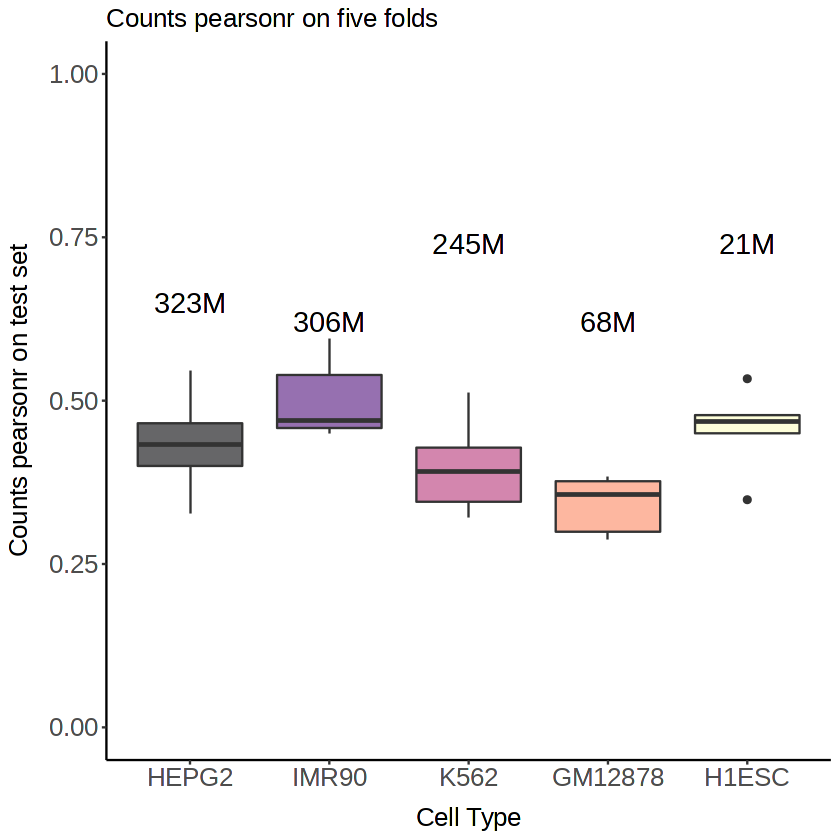

In [14]:
# Boxplot basic

metadata %>%
  ggplot( aes(x=cell_type, y=counts_pearsonr_in_peaks, fill=cell_type)) +
    geom_boxplot() + 
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme_classic() +
    annotate("text", x=1.0, y=0.65, label="323M", size=6)+
    annotate("text", x=2, y=0.62, label="306M", size=6)+
    annotate("text", x=3, y=0.74, label="245M", size=6)+
    annotate("text", x=4, y=0.62, label="68M", size=6)+
    annotate("text", x=5, y=0.74, label="21M", size=6)+

    ggtitle("Counts pearsonr on five folds") +
    xlab("Cell Type") + 
    ylab("Counts pearsonr on test set") +
    theme(
     legend.position="none",
     plot.title = element_text(size=15),
     axis.text=element_text(size=15),
     axis.title=element_text(size=15),
     axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0), hjust = 0.5, size=15),
     axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0), hjust = 0.5, size=15),
        
    )  +
    ylim(0, 1)


ggsave(file.path("figure_2_supp", paste(dataset,"_counts_pearsonr_nonpeaks.pdf", sep="")), dpi=300, device="pdf")

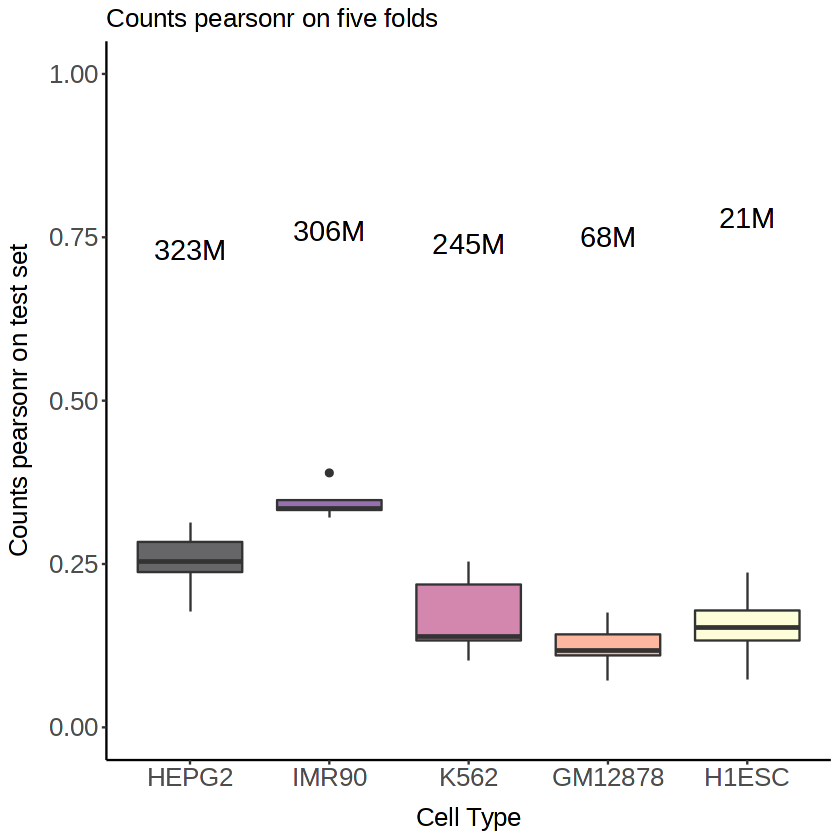

In [9]:
# Boxplot basic

metadata %>%
  ggplot( aes(x=cell_type, y=counts_pearsonr_in_peaks_nonpeaks, fill=cell_type)) +
    geom_boxplot() + 
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme_classic() +
    annotate("text", x=1.0, y=0.73, label="323M", size=6)+
    annotate("text", x=2, y=0.76, label="306M", size=6)+
    annotate("text", x=3, y=0.74, label="245M", size=6)+
    annotate("text", x=4, y=0.75, label="68M", size=6)+
    annotate("text", x=5, y=0.78, label="21M", size=6)+

    ggtitle("Counts pearsonr on five folds") +
    xlab("Cell Type") + 
    ylab("Counts pearsonr on test set") +
    theme(
     legend.position="none",
     plot.title = element_text(size=15),
     axis.text=element_text(size=15),
     axis.title=element_text(size=15),
     axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0), hjust = 0.5, size=15),
     axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0), hjust = 0.5, size=15),
        
    ) +
    ylim(0, 1)


#ggsave(file.path("figure_1_supp", paste(dataset,"_counts_pearsonr_peaks_nonpeaks.pdf", sep="")), dpi=300, device="pdf")

Saving 6.67 x 6.67 in image



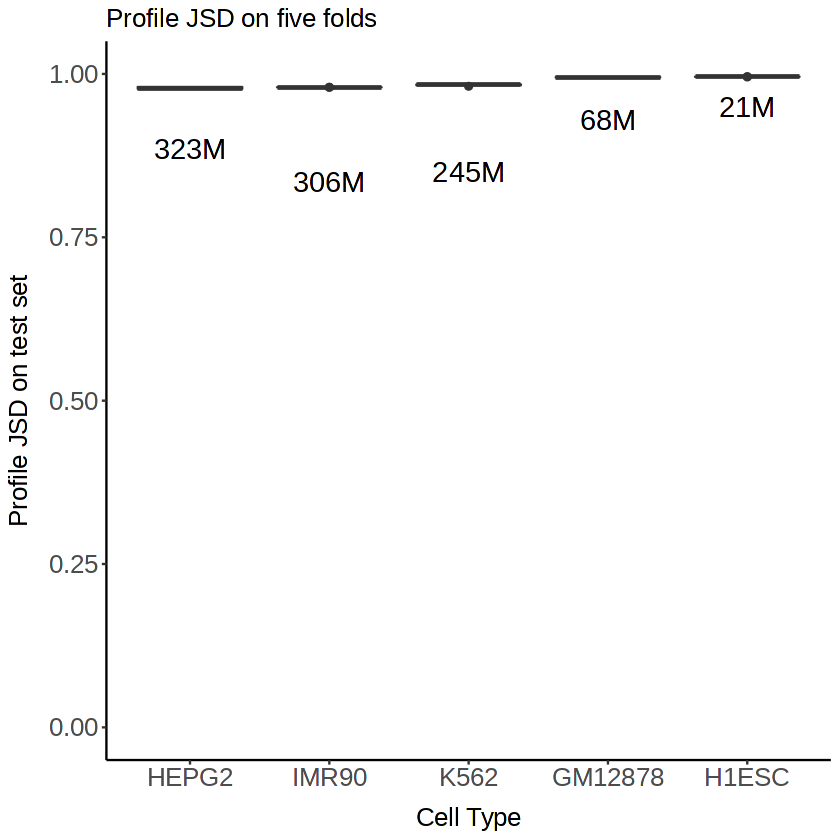

In [15]:

# Boxplot basic

metadata %>%
  ggplot( aes(x=cell_type, y=profile_jsd_in_peaks, fill=cell_type)) +
    geom_boxplot() + 
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme_classic() +
    annotate("text", x=1.0, y=0.885, label="323M", size=6)+
    annotate("text", x=2, y=0.835, label="306M", size=6)+
    annotate("text", x=3, y=0.85, label="245M", size=6)+
    annotate("text", x=4, y=0.93, label="68M", size=6)+
    annotate("text", x=5, y=0.95, label="21M", size=6)+
    ggtitle("Profile JSD on five folds") +
    xlab("Cell Type") + 
    ylab("Profile JSD on test set") +
    theme(
     legend.position="none",
     plot.title = element_text(size=15),
     axis.text=element_text(size=15),
     axis.title=element_text(size=15),
     axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0), hjust = 0.5, size=15),
     axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0), hjust = 0.5, size=15),
        
    ) +
    ylim(0, 1)


ggsave(file.path("figure_2_supp", paste(dataset,"_profile_jsd_nonpeaks.pdf", sep="")), dpi=300, device="pdf")

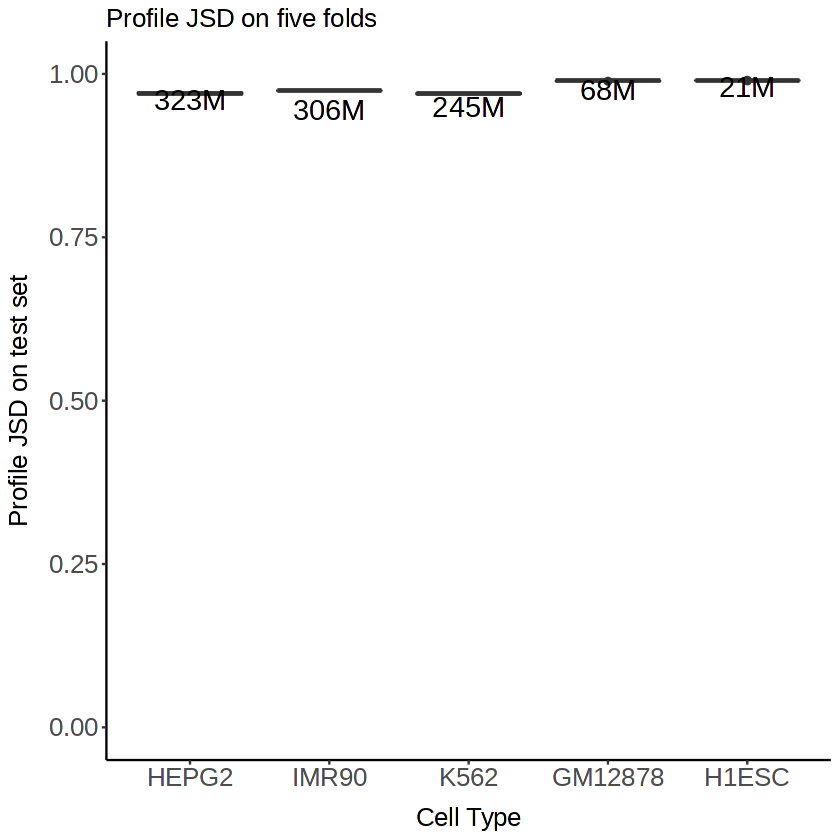

In [11]:

# Boxplot basic

metadata %>%
  ggplot( aes(x=cell_type, y=profile_jsd_in_peaks_nonpeaks, fill=cell_type)) +
    geom_boxplot() + 
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme_classic() +
    annotate("text", x=1.0, y=0.96, label="323M", size=6)+
    annotate("text", x=2, y=0.945, label="306M", size=6)+
    annotate("text", x=3, y=0.95, label="245M", size=6)+
    annotate("text", x=4, y=0.975, label="68M", size=6)+
    annotate("text", x=5, y=0.98, label="21M", size=6)+

    ggtitle("Profile JSD on five folds") +
    xlab("Cell Type") + 
    ylab("Profile JSD on test set") +
    theme(
     legend.position="none",
     plot.title = element_text(size=15),
     axis.text=element_text(size=15),
     axis.title=element_text(size=15),
     axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0), hjust = 0.5, size=15),
     axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0), hjust = 0.5, size=15),
        
    ) +
    ylim(0, 1)


#ggsave(file.path("figure_1_supp", paste(dataset,"_profile_jsd_peaks_nonpeaks.pdf", sep="")), dpi=300, device="pdf")